In [2]:
import pandas as pd


In [3]:
alcohol_sales_path = 'C:/Users/lavan/Downloads/Alcohol_Sales.csv'
miles_traveled_path = 'C:/Users/lavan/Downloads/Miles_Traveled.csv'

In [4]:
alcohol_sales_df = pd.read_csv(alcohol_sales_path)
miles_traveled_df = pd.read_csv(miles_traveled_path)

In [5]:
alcohol_sales_df.head(), miles_traveled_df.head()

(         DATE  S4248SM144NCEN
 0  1992-01-01            3459
 1  1992-02-01            3458
 2  1992-03-01            4002
 3  1992-04-01            4564
 4  1992-05-01            4221,
          DATE  TRFVOLUSM227NFWA
 0  1970-01-01           80173.0
 1  1970-02-01           77442.0
 2  1970-03-01           90223.0
 3  1970-04-01           89956.0
 4  1970-05-01           97972.0)

In [6]:
alcohol_sales_df['DATE'] = pd.to_datetime(alcohol_sales_df['DATE'])
miles_traveled_df['DATE'] = pd.to_datetime(miles_traveled_df['DATE'])

In [7]:
alcohol_sales_df.set_index('DATE', inplace=True)
miles_traveled_df.set_index('DATE', inplace=True)


In [8]:
alcohol_sales_missing = alcohol_sales_df.isnull().sum()
miles_traveled_missing = miles_traveled_df.isnull().sum()


In [9]:
alcohol_sales_missing, miles_traveled_missing

(S4248SM144NCEN    0
 dtype: int64,
 TRFVOLUSM227NFWA    0
 dtype: int64)

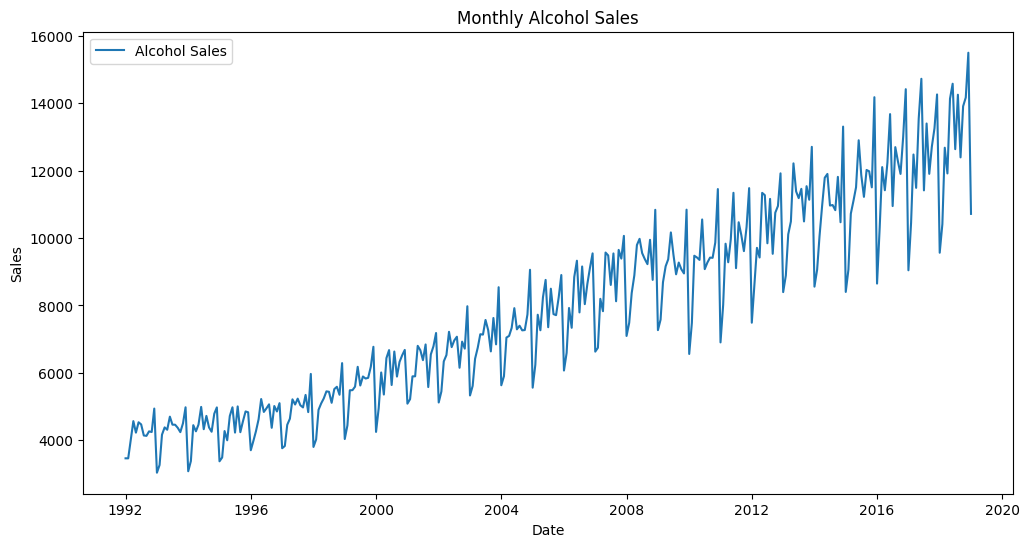

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(alcohol_sales_df, label='Alcohol Sales')
plt.title('Monthly Alcohol Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [12]:
pip install pandas matplotlib statsmodels scikit-learn



   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.2/9.8 MB 5.3 MB/s eta 0:00:02
   - -------------------------------------- 0.4/9.8 MB 4.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/9.8 MB 3.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/9.8 MB 4.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/9.8 MB 3.8 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.8 MB 2.9 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/9.8 MB 3.1 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.8 MB 2.9 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.8 MB 3.1 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/9.8 MB 3.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.8 MB 3.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.8 MB 2.9 MB/s eta 0:00:03
   ------- -------


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [13]:
train_size = int(len(alcohol_sales_df) * 0.8)
train, test = alcohol_sales_df[:train_size], alcohol_sales_df[train_size:]


In [16]:
arima_model = ARIMA(train, order=(5, 1, 0))  # ARIMA(p,d,q), p=5, d=1, q=0 as initial guess
arima_fit = arima_model.fit()

C:\Users\lavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [17]:
start = len(train)
end = len(train) + len(test) - 1
arima_predictions = arima_fit.predict(start=start, end=end, typ='levels')


C:\Users\lavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [18]:
rmse = np.sqrt(mean_squared_error(test, arima_predictions))
mae = mean_absolute_error(test, arima_predictions)

In [19]:
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 1754.4605642176145
MAE: 1397.6341358960055


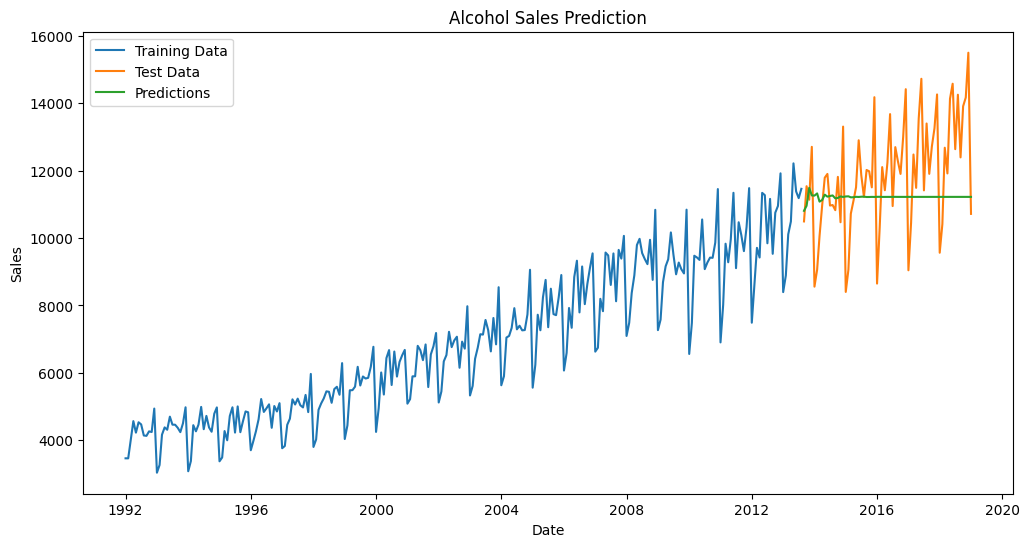

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(arima_predictions, label='Predictions')
plt.title('Alcohol Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
